In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from xrdc import source_separation as sep
from xrdc.datasets import d2d

matplotlib.rcParams.update({'font.size': 18})

Load a 2D dataset, consisting of a series of ordered 1D XRD patterns. The ordering variable is sample temperature.

In [2]:
patterns = d2d.patterns

background, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7,
                                                    background_after_filter = False)

(0, 0)


In [3]:
def heatmap(fig, arr, label = '', **kwargs):
    ax = fig
    stride = 100
    qticks = np.arange(len(arr[0]))
    labels = ['{:0.1f}'.format(elt) for elt in qticks]
    
    ax.set_xticklabels(labels);
    ax.set_xticks(np.arange(len(qticks)) * stride);
    if kwargs is not None:
        (kwargs.update(imargs))
    else:
        kwargs = imargs
    plt.imshow(arr, **kwargs)
    plt.title(label)
    annotate()
    
def norm(arr):
    return arr / arr.mean()

def annotate():
    plt.xlabel('$q~(1 / A)$')
    plt.ylabel('sample index')

<ipython-input-3-f04b16202b52>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels);


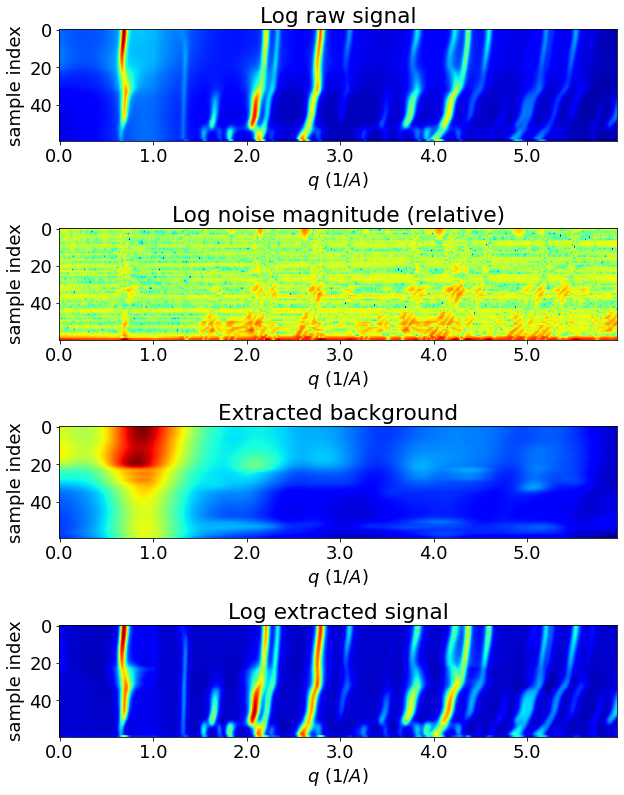

In [4]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)
spec = fig.add_gridspec(4, 2)

imargs = {'cmap': 'jet', 'aspect': 2}

ax0 = fig.add_subplot(spec[0, :])
heatmap(ax0, np.log(1 + norm(patterns)), label = 'Log raw signal')

ax1 = fig.add_subplot(spec[1, :])
heatmap(ax1, np.log10(np.abs(fast_T / patterns) ), "Log noise magnitude (relative)")

ax2 = fig.add_subplot(spec[2, :])
heatmap(ax2, background, 'Extracted background')

ax3 = fig.add_subplot(spec[3, :])
heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")

Interactive plot showing separation in the ordinal (temperature) dimension:

In [5]:
sep.iplot_rows(slow_T.T, patterns.T, labels = ['low-frequency (T)', 'raw data'], log = False, offset = 0)

interactive(children=(IntSlider(value=298, description='i', max=596), Output(layout=Layout(height='550px'))), …